## **Importing libraries**

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from itertools import chain
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

import time
import glob

import tensorflow as tf
from tensorflow import keras

## **Importing images**

### **Creating placeholder arrays**

In [2]:
classes = 5
samples = 2650

In [3]:
# There are 250 pictures per class, 150x150 pixels, total 1250 samples.

# Create placeholder arrays  
X = np.zeros((samples*classes, 150, 150))
y = np.zeros(samples*classes)

print(X.shape, y.shape)

(13250, 150, 150) (13250,)


### **Fetch filenames**

In [4]:
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
folders = ["hello", "iloveyou", "no", "sorry", "yes"]
folder_path = "C:\\Users\\visha\\OneDrive\\Documentos\\Code\\endor\\sign_language\\Images\\images_final\\"
file_names = []

# Create a list with all of the images
for folder in folders:
    for f in glob.glob(folder_path + folder + '/**/*', recursive=True):
        if f[-4:] == '.jpg':
            file_names.append(f)
            
print(len(file_names))

13250


### **Save features in X array**

In [5]:
for i, file in enumerate(file_names):
    image = np.array(Image.open(file).convert('L'))
    X[i] = image

print(X.shape)

(13250, 150, 150)


In [6]:
X = X.astype(np.float32)
print(X.shape, X.dtype)

(13250, 150, 150) float32


### **Save labels in y array**

In [7]:
# Create the labels array
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
for i in range(classes):
    y[i*samples:i*samples+samples] = i

y = y.astype(np.int64)
print(y.dtype)
print(np.unique(y, return_counts=True))

int64
(array([0, 1, 2, 3, 4], dtype=int64), array([2650, 2650, 2650, 2650, 2650], dtype=int64))


### **Visualize samples**

Label: 0


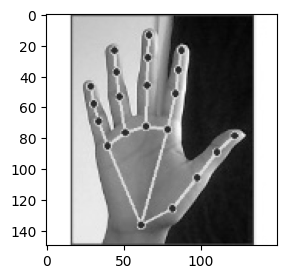

In [8]:
# Visualize a training sample
plt.figure(figsize=(3,3))
plt.imshow(X[0].reshape((150,150)), cmap="gray")
print("Label:", y[0])

Label: 2


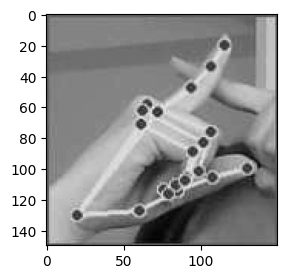

In [9]:
# Visualize a training sample
plt.figure(figsize=(3,3))
plt.imshow(X[7762].reshape((150,150)), cmap="gray")
print("Label:", y[7762])

## **Separating train and test data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11925, 150, 150) (11925,)
(1325, 150, 150) (1325,)


## **Setting up the NN**

In [11]:
# Defining the model architecture
# * Input layer: 22500 features (150x150 pixels)
# * Output layer: 5, one per class.
# * Uses Softmax function to get class probabilities.

## Model V1
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(150, 150)),
#     keras.layers.Dense(800, activation='relu'),
#     keras.layers.Dense(70, activation='relu'),
#     keras.layers.Dense(5, activation='softmax')
# ])

In [12]:
## Model V2
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(150, 150)),
#     keras.layers.Dense(700, activation='relu'),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(70, activation='relu'),
#     keras.layers.Dense(5, activation='softmax')
# ])

In [13]:
## Model V3
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(150, 150)),
#     keras.layers.Dense(5, activation='softmax')
# ])

In [14]:
## Model V4
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

In [15]:
## V5
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(150, 150)),
#     keras.layers.Dense(500, activation='relu'),
#     keras.layers.Dense(70, activation='relu'),
#     keras.layers.Dense(5, activation='softmax')
# ])

In [16]:
callback = keras.callbacks.EarlyStopping(monitor='accuracy', patience=2, restore_best_weights=True, min_delta=0.05, start_from_epoch=20)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model

## **Training the model**

In [17]:
start_time = time.time()
epochs = 100

model.fit(X_train, y_train, epochs=epochs)

# Print how long the training/testing took
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch 1/100
373/373 [==============================] - 46s 121ms/step - loss: 307.2589 - accuracy: 0.6527
Epoch 2/100
373/373 [==============================] - 42s 113ms/step - loss: 65.6273 - accuracy: 0.8626
Epoch 3/100
373/373 [==============================] - 42s 113ms/step - loss: 33.1347 - accuracy: 0.9237
Epoch 4/100
373/373 [==============================] - 42s 112ms/step - loss: 38.4010 - accuracy: 0.9005
Epoch 5/100
373/373 [==============================] - 42s 112ms/step - loss: 12.1746 - accuracy: 0.9499
Epoch 6/100
373/373 [==============================] - 42s 111ms/step - loss: 13.7436 - accuracy: 0.9416
Epoch 7/100
373/373 [==============================] - 42s 113ms/step - loss: 10.6279 - accuracy: 0.9515
Epoch 8/100
373/373 [==============================] - 42s 112ms/step - loss: 4.2186 - accuracy: 0.9741
Epoch 9/100
373/373 [==============================] - 43s 115ms/step - loss: 9.4561 - accuracy: 0.9472
Epoch 10/100
373/373 [==============================] - 

## **Evaluating the model**

In [18]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

42/42 - 0s - loss: 1.6095 - accuracy: 0.1766 - 448ms/epoch - 11ms/step

Test accuracy: 0.1766037791967392


In [19]:
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
class_names = ["hello", "iloveyou", "no", "sorry", "yes"]
predictions = model.predict(X_test)

42/42 [==============================] - 0s 8ms/step


In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(classes))
  plt.yticks([])
  thisplot = plt.bar(range(classes), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

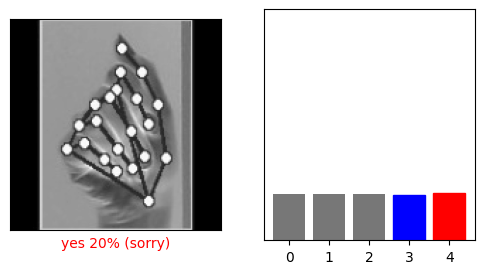

In [21]:
i = 124
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

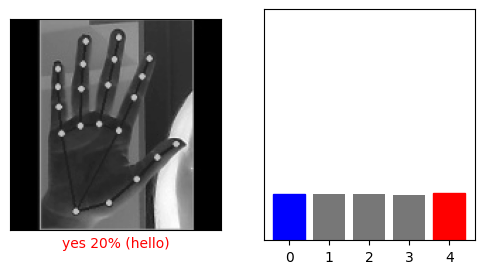

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

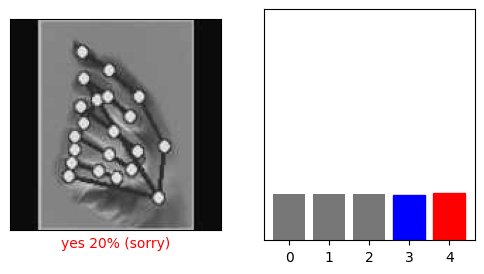

In [23]:
i = 23
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

## **Save model for inference**

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22500)             0         
                                                                 
 dense (Dense)               (None, 300)               6750300   
                                                                 
 dense_1 (Dense)             (None, 50)                15050     
                                                                 
 dense_2 (Dense)             (None, 5)                 255       
                                                                 
Total params: 6,765,605
Trainable params: 6,765,605
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.save("C:/Users/visha/OneDrive/Documentos/Code/endor/sign_language/Model/Model_3_f.h5", save_format='h5')
#model.save("C:/Users/visha/OneDrive/Documentos/Code/endor/sign_language/Model/Model_3_f.keras")